In [52]:
taxi = pd.read_csv("/Users/jisuim/Desktop/tp_taxi/jisu/train.csv")

In [53]:
taxi_ex = taxi.copy()

In [10]:
taxi_ex.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [66]:
taxi_ex.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'time_n'],
      dtype='object')

In [69]:
set(taxi_ex["vendor_id"])

{1.0, 2.0}

In [70]:
set(taxi_ex["passenger_count"])

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}

In [71]:
set(taxi_ex["store_and_fwd_flag"])

{'N', 'Y'}

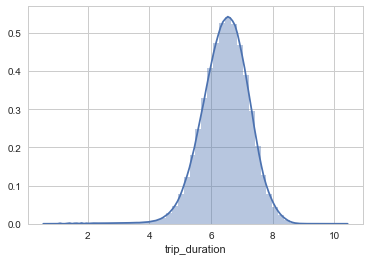

In [74]:
sns.distplot(np.log1p(taxi_ex["trip_duration"]))

# vendor_id -> dummy variable 변환

In [11]:
dummy_id=pd.get_dummies(taxi_ex['vendor_id'],prefix='id')

In [12]:
dummy_id.head()

,id_1,id_2
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [13]:
y = list(taxi_ex['trip_duration'])

In [14]:
model = sm.OLS(y, dummy_id)
result = model.fit()
print(result.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 08 Mar 2018   Prob (F-statistic):          8.05e-133
Time:                        23:03:29   Log-Likelihood:            -1.4561e+07
No. Observations:             1458644   AIC:                         2.912e+07
Df Residuals:                 1458642   BIC:                         2.912e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
id_1         845.4382      6.358    132.977      0.0

> vendor_id가 2일 때 trip_duration이 더 길다

# pickup datetime 
- 시간대별
- 월별
- 요일별

### 월별 OLS

In [15]:
for i in range(len(taxi)):
    k = taxi_ex['pickup_datetime'][i][5:7]
    taxi_ex.at[i, "month"] = k 
## 월별 column 추가

In [16]:
dummy_month = pd.get_dummies(taxi_ex['month'],prefix='month')


In [17]:
model = sm.OLS(y, dummy_month)
result = model.fit()
print(result.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     13.69
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           2.14e-13
Time:                        23:40:28   Log-Likelihood:            -1.4561e+07
No. Observations:             1458644   AIC:                         2.912e+07
Df Residuals:                 1458638   BIC:                         2.912e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month_01     922.3733     10.928     84.408      0.0

### 시간대별 OLS

In [18]:
for i in range(len(taxi)):
    k = taxi_ex['pickup_datetime'][i][11:13]
    taxi_ex.at[i, "time"] = k  

In [19]:
dummy_time = pd.get_dummies(taxi_ex['time'],prefix='time')

In [20]:
model = sm.OLS(y, dummy_time)
result = model.fit()
print(result.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.33
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           4.83e-56
Time:                        23:56:02   Log-Likelihood:            -1.4561e+07
No. Observations:             1458644   AIC:                         2.912e+07
Df Residuals:                 1458620   BIC:                         2.912e+07
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time_00      936.6573     22.695     41.272      0.0

### 요일별 OLS

In [ ]:
import calendar
for i in range(len(taxi)):
    m = taxi_ex['pickup_datetime'][i][5:7]
    d = taxi_ex['pickup_datetime'][i][8:10]
    k = calendar.weekday(2016, int(m), int(d))
    taxi_ex.at[i, "week"] = k

In [ ]:
dummy_week = pd.get_dummies(taxi_ex['week'],prefix='week')

In [ ]:
model = sm.OLS(y, dummy_week)
result = model.fit()
print(result.summary())  

# passenger count

In [ ]:
X = sm.add_constant(taxi_ex['passenger_count'])

In [ ]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary()) 

# distance

In [54]:
from math import cos, asin, sqrt
def dist(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295     #Pi/180
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a))

In [55]:
for i in range(len(taxi)):
    lat1 = taxi['pickup_latitude'][i]
    lon1 = taxi['pickup_longitude'][i]
    lat2 = taxi['dropoff_latitude'][i]
    lon2 = taxi['dropoff_longitude'][i]
    taxi_ex.at[i, 'distance'] = dist(lat1, lon1, lat2, lon2)


In [56]:
X = sm.add_constant(taxi_ex['distance'])
model = sm.OLS(y, X)
result = model.fit()
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                 1.322e+04
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:30:53   Log-Likelihood:            -1.4554e+07
No. Observations:             1458644   AIC:                         2.911e+07
Df Residuals:                 1458642   BIC:                         2.911e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        561.9630      5.531    101.607      0.0

# outlier removal

In [58]:
taxi_ex.loc[taxi_ex.distance > 200] = np.nan ##200km 넘는 데이터 제거
taxi_ex.loc[taxi_ex.trip_duration > 30000] = np.nan ##40000초(약 11시간)가 넘는 데이터 제거
taxi_ex.loc[taxi_ex.passenger_count == 0] = np.NAN   ### passenger 수가 0인 데이터 제거
taxi_ex.dropna(inplace=True)

In [26]:
len(taxi_ex)

1456542

In [27]:
len(taxi)

1458644

In [59]:
### outlier 제거 후 R^2 증가
y = list(taxi_ex['trip_duration'])
X = sm.add_constant(taxi_ex['distance'])
model = sm.OLS(y, X)
result = model.fit()
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                 1.903e+06
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:32:24   Log-Likelihood:            -1.0943e+07
No. Observations:             1456542   AIC:                         2.189e+07
Df Residuals:                 1456540   BIC:                         2.189e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        397.7495      0.486    817.680      0.0

In [29]:
taxi_week = pd.DataFrame(taxi_ex, columns=['week','trip_duration'])
taxi_week = taxi_week.groupby('week').agg('mean').reset_index()

In [30]:
taxi_week

,week,trip_duration


In [31]:
taxi_time = pd.DataFrame(taxi_ex, columns=["time", "trip_duration"])
taxi_time = taxi_time.groupby("time").agg("mean").reset_index()
taxi_time

,time,trip_duration
0,00,780.382669
1,01,740.166701
2,02,701.307701
3,03,702.186655
4,04,733.973277
5,05,712.459900
6,06,671.670921
7,07,758.865398
8,08,834.686364
9,09,844.035968


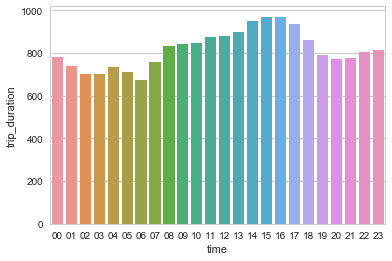

In [32]:
sns.barplot(taxi_time['time'], taxi_time['trip_duration'])
plt.xlabel('time')
plt.ylabel('trip_duration')
plt.show()

> 19~00(Night) / 01~07(Morning) / 08~18(Duty) 로 분할하기

In [33]:
taxi_month = pd.DataFrame(taxi_ex, columns=["month", "trip_duration"])
taxi_month = taxi_month.groupby('month').agg('mean').reset_index()
taxi_month

,month,trip_duration
0,01,791.184369
1,02,790.638394
2,03,818.482927
3,04,848.866341
4,05,884.492226
5,06,891.140486


# Feature Engineering

In [57]:
### 시간대 19~00(Night) / 01~07(Morning) / 08~18(Duty) 로 분할하기
Morning = ['01','02','03','04','05','06','07']
Night = ['19', '20', '21', '22', '23', '00']
for i in range(len(taxi_ex)):
    k = taxi_ex['pickup_datetime'][i][11:13]
    if k in Morning:
        taxi_ex.at[i, "time_n"] = "Morning"
    elif k in Night:
        taxi_ex.at[i, "time_n"] = "Night"
    else:
        taxi_ex.at[i, "time_n"] = "Duty"
        
     

In [60]:
dummy_time_n = pd.get_dummies(taxi_ex['time_n'],prefix='time_n')

In [61]:
### 시간대를 Morning/ Duty/ Night 로 나눈 OLS
y = list(taxi_ex['trip_duration'])
model = sm.OLS(y, dummy_time_n)
result = model.fit()
print(result.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     7318.
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:32:34   Log-Likelihood:            -1.1544e+07
No. Observations:             1456542   AIC:                         2.309e+07
Df Residuals:                 1456539   BIC:                         2.309e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
time_n_Duty      896.5556      0.754   1188.

In [36]:
taxi_ex.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,time,distance,time_n
0,id2875421,2.0,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0,03,17,1.498521,Duty
1,id2377394,1.0,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663.0,06,00,1.805507,Night
2,id3858529,2.0,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,01,11,6.385098,Duty
3,id3504673,2.0,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429.0,04,19,1.485498,Night
4,id2181028,2.0,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435.0,03,13,1.188588,Duty
5,id0801584,2.0,2016-01-30 22:01:40,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443.0,01,22,1.098942,Night
6,id1813257,1.0,2016-06-17 22:34:59,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,341.0,06,22,1.326279,Night
7,id1324603,2.0,2016-05-21 07:54:58,2016-05-21 08:20:49,1.0,-73.969276,40.797779,-73.922470,40.760559,N,1551.0,05,07,5.714981,Morning
8,id1301050,1.0,2016-05-27 23:12:23,2016-05-27 23:16:38,1.0,-73.999481,40.738400,-73.985786,40.732815,N,255.0,05,23,1.310353,Night
9,id0012891,2.0,2016-03-10 21:45:01,2016-03-10 22:05:26,1.0,-73.981049,40.744339,-73.973000,40.789989,N,1225.0,03,21,5.121162,Night


In [37]:
dfX = pd.concat([dummy_time_n, taxi_ex['distance']], axis=1)

In [38]:
dfX.head()

,time_n_Duty,time_n_Morning,time_n_Night,distance
0,1,0,0,1.498521
1,0,0,1,1.805507
2,1,0,0,6.385098
3,0,0,1,1.485498
4,1,0,0,1.188588


In [39]:
### 시간대, 거리에 따른 trip_duration
y = list(taxi_ex['trip_duration'])
model = sm.OLS(y, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                 7.015e+05
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:10:15   Log-Likelihood:            -1.0900e+07
No. Observations:             1456542   AIC:                         2.180e+07
Df Residuals:                 1456538   BIC:                         2.180e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
time_n_Duty      482.2225      0.564    855.

In [40]:
test_y = result.predict(dfX2)

NameError: name 'dfX2' is not defined

# clustering

> pickup clusters

In [91]:
X = list(zip(taxi_ex['pickup_longitude'], taxi_ex['pickup_latitude']))

In [92]:
X[:5]

[(-73.98215484619139, 40.76793670654297),
 (-73.98041534423827, 40.738563537597656),
 (-73.97902679443358, 40.763938903808594),
 (-74.01004028320312, 40.719970703125),
 (-73.97305297851562, 40.79320907592773)]

In [94]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=30, init="random", n_init=1, max_iter=1, random_state=1).fit(X)

In [95]:
centroids = model.cluster_centers_

In [96]:
centroids

array([[-73.96149267,  40.77009076],
       [-73.98537879,  40.73923755],
       [-73.99358671,  40.76227585],
       [-73.99296917,  40.75511384],
       [-74.00131684,  40.69673166],
       [-73.99122492,  40.73720996],
       [-74.01485971,  40.71520859],
       [-73.9835016 ,  40.77684673],
       [-73.98188706,  40.75557074],
       [-73.99720424,  40.73910331],
       [-73.97525821,  40.75260428],
       [-73.9791788 ,  40.76939223],
       [-73.96887549,  40.7865967 ],
       [-74.00425435,  40.73231635],
       [-73.99985627,  40.72253066],
       [-73.99264851,  40.74888642],
       [-73.9783598 ,  40.76161486],
       [-73.98599976,  40.74369233],
       [-73.95082864,  40.77344417],
       [-73.79405653,  40.64993388],
       [-73.92167347,  40.7875675 ],
       [-73.77718167,  40.64721708],
       [-73.97748029,  40.74548014],
       [-73.9658192 ,  40.76098562],
       [-73.97629889,  40.72924458],
       [-73.96944765,  40.73553817],
       [-73.98689496,  40.7591586 ],
 

In [97]:
def kmeans_df(centroids):
    df = pd.DataFrame(np.hstack([X,
                                model.labels_[:, np.newaxis]]),
                    columns=["lon", "lat", "c"])
    return df

In [98]:
clusters = kmeans_df(centroids)

In [99]:
dummy_pick_clus = pd.get_dummies(clusters['c'],prefix='pick_clus')

In [100]:
y = list(taxi_ex['trip_duration'])
model = sm.OLS(y, dummy_pick_clus)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                 1.049e+04
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:07:02   Log-Likelihood:            -1.1413e+07
No. Observations:             1456542   AIC:                         2.283e+07
Df Residuals:                 1456512   BIC:                         2.283e+07
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
pick_clus_0.0    707.5802      2.150    329.

> dropoff cluster

In [109]:
X_2 = list(zip(taxi_ex['dropoff_longitude'], taxi_ex['dropoff_latitude']))

In [110]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=30, init="random", n_init=1, max_iter=1, random_state=1).fit(X_2)

In [111]:
centroids_2 = model.cluster_centers_

In [112]:
clusters_2 = kmeans_df(centroids_2)

In [113]:
dummy_drop_clus = pd.get_dummies(clusters_2['c'],prefix='drop_clus')

In [114]:
y = list(taxi_ex['trip_duration'])
model = sm.OLS(y, dummy_drop_clus)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     8848.
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:08:32   Log-Likelihood:            -1.1433e+07
No. Observations:             1456542   AIC:                         2.287e+07
Df Residuals:                 1456512   BIC:                         2.287e+07
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
drop_clus_0.0    753.1443      3.161    238.

In [120]:
newcol = pd.concat([dummy_drop_clus, dummy_pick_clus, taxi_ex['distance']], axis=1 )

In [123]:
newcol.head()

,drop_clus_0.0,drop_clus_1.0,drop_clus_2.0,drop_clus_3.0,drop_clus_4.0,drop_clus_5.0,drop_clus_6.0,drop_clus_7.0,drop_clus_8.0,drop_clus_9.0,...,pick_clus_21.0,pick_clus_22.0,pick_clus_23.0,pick_clus_24.0,pick_clus_25.0,pick_clus_26.0,pick_clus_27.0,pick_clus_28.0,pick_clus_29.0,distance
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.498521
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.805507
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.385098
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.485498
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.188588


In [121]:
len(newcol)

1458641

In [124]:
y = list(taxi_ex['trip_duration'])
model = sm.OLS(y, newcol)
result = model.fit()
print(result.summary())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/linalg/linalg.py:1647: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


ValueError: endog and exog matrices are different sizes